Crop and Fertilizer Recomendation System using ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crop = pd.read_csv("Dataset/Crop_recommendation.csv")

In [4]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
crop.shape

(2200, 8)

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [9]:

crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
crop.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [11]:
crop.duplicated().sum()

np.int64(0)

In [12]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [14]:
crop['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [15]:
feautures=crop.columns.to_list()
feautures.remove('label')
print(feautures)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


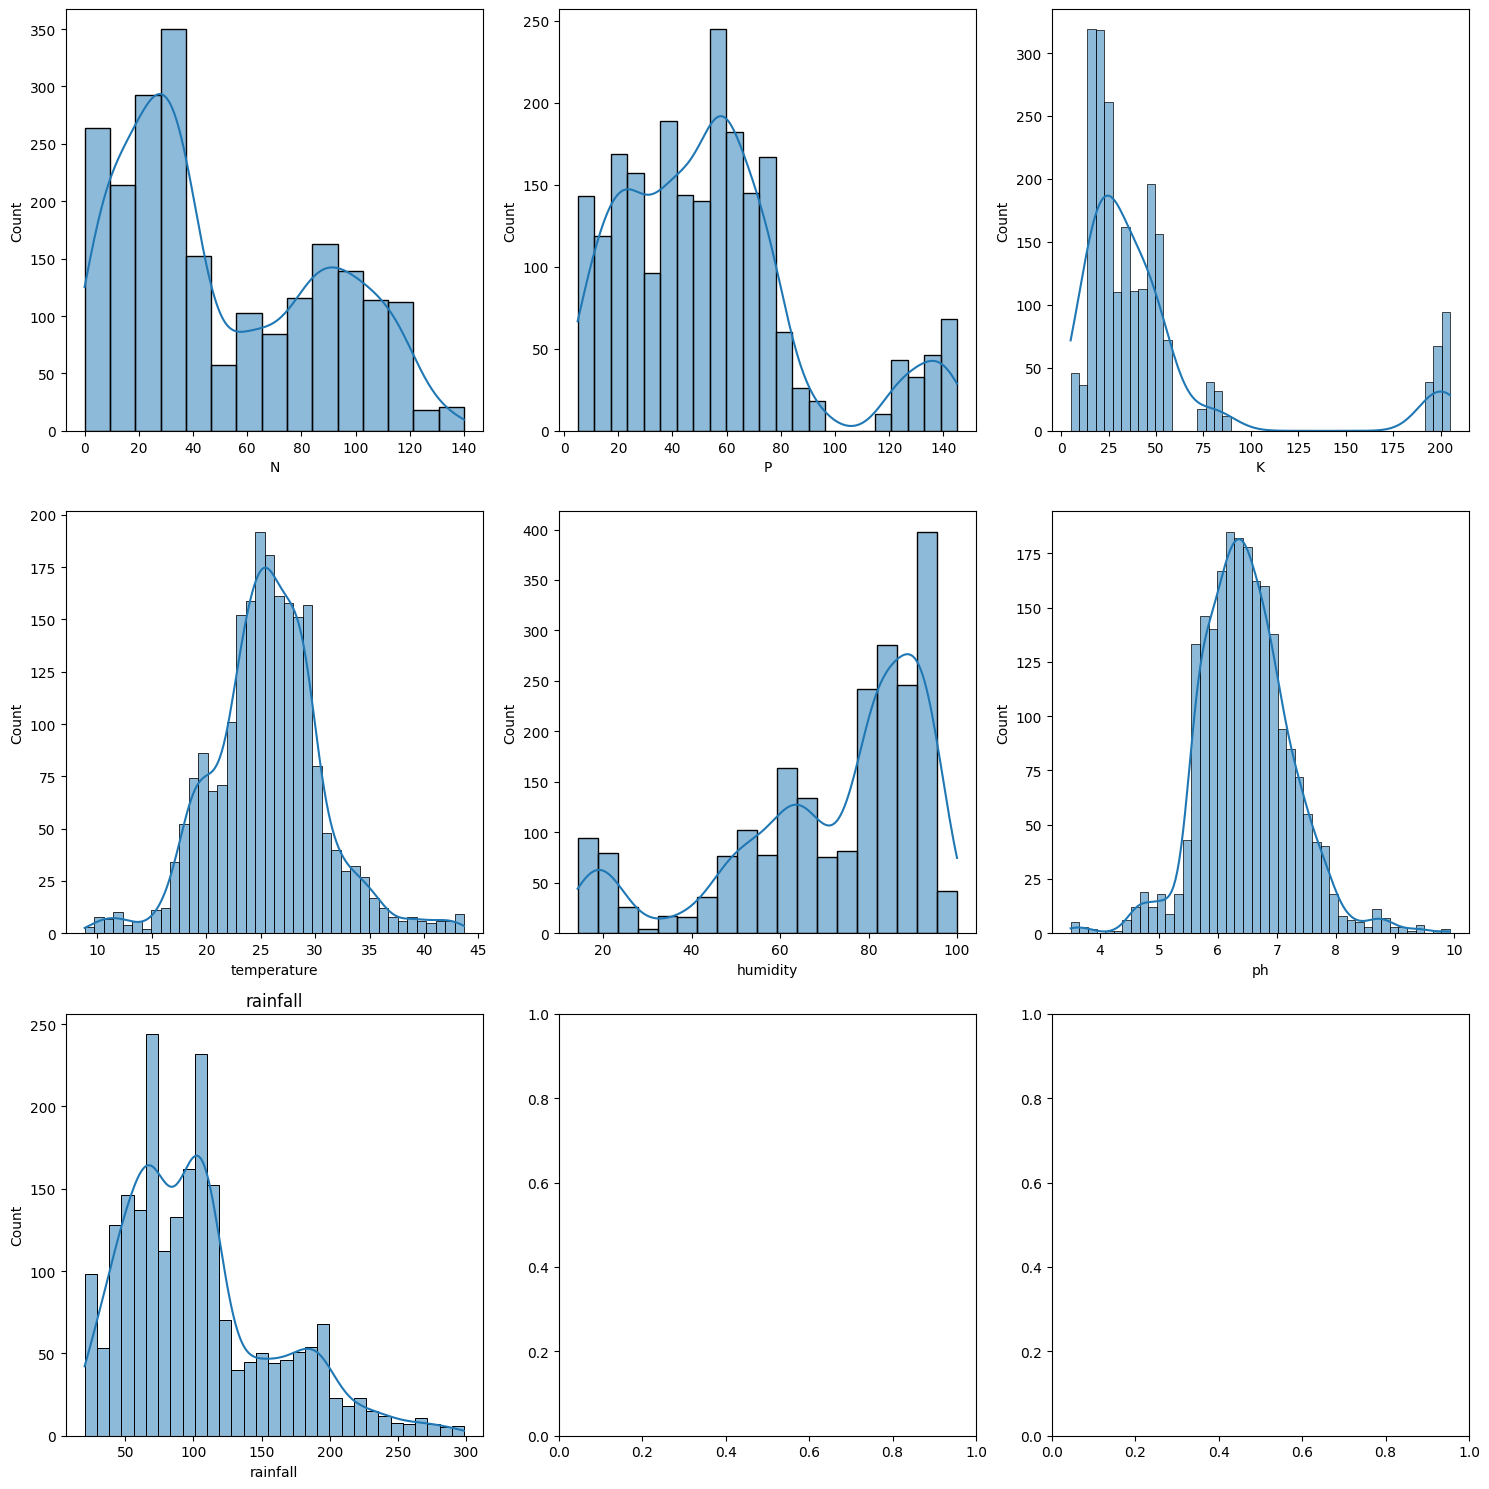

In [16]:
import seaborn as sns
fig, ax=plt.subplots(3,3,figsize=(15,15))
for i,subplot in zip(feautures,ax.flatten()):
    sns.histplot(crop[i],ax=subplot,kde=True)
subplot.set_title(i)
plt.tight_layout()

plt.show()

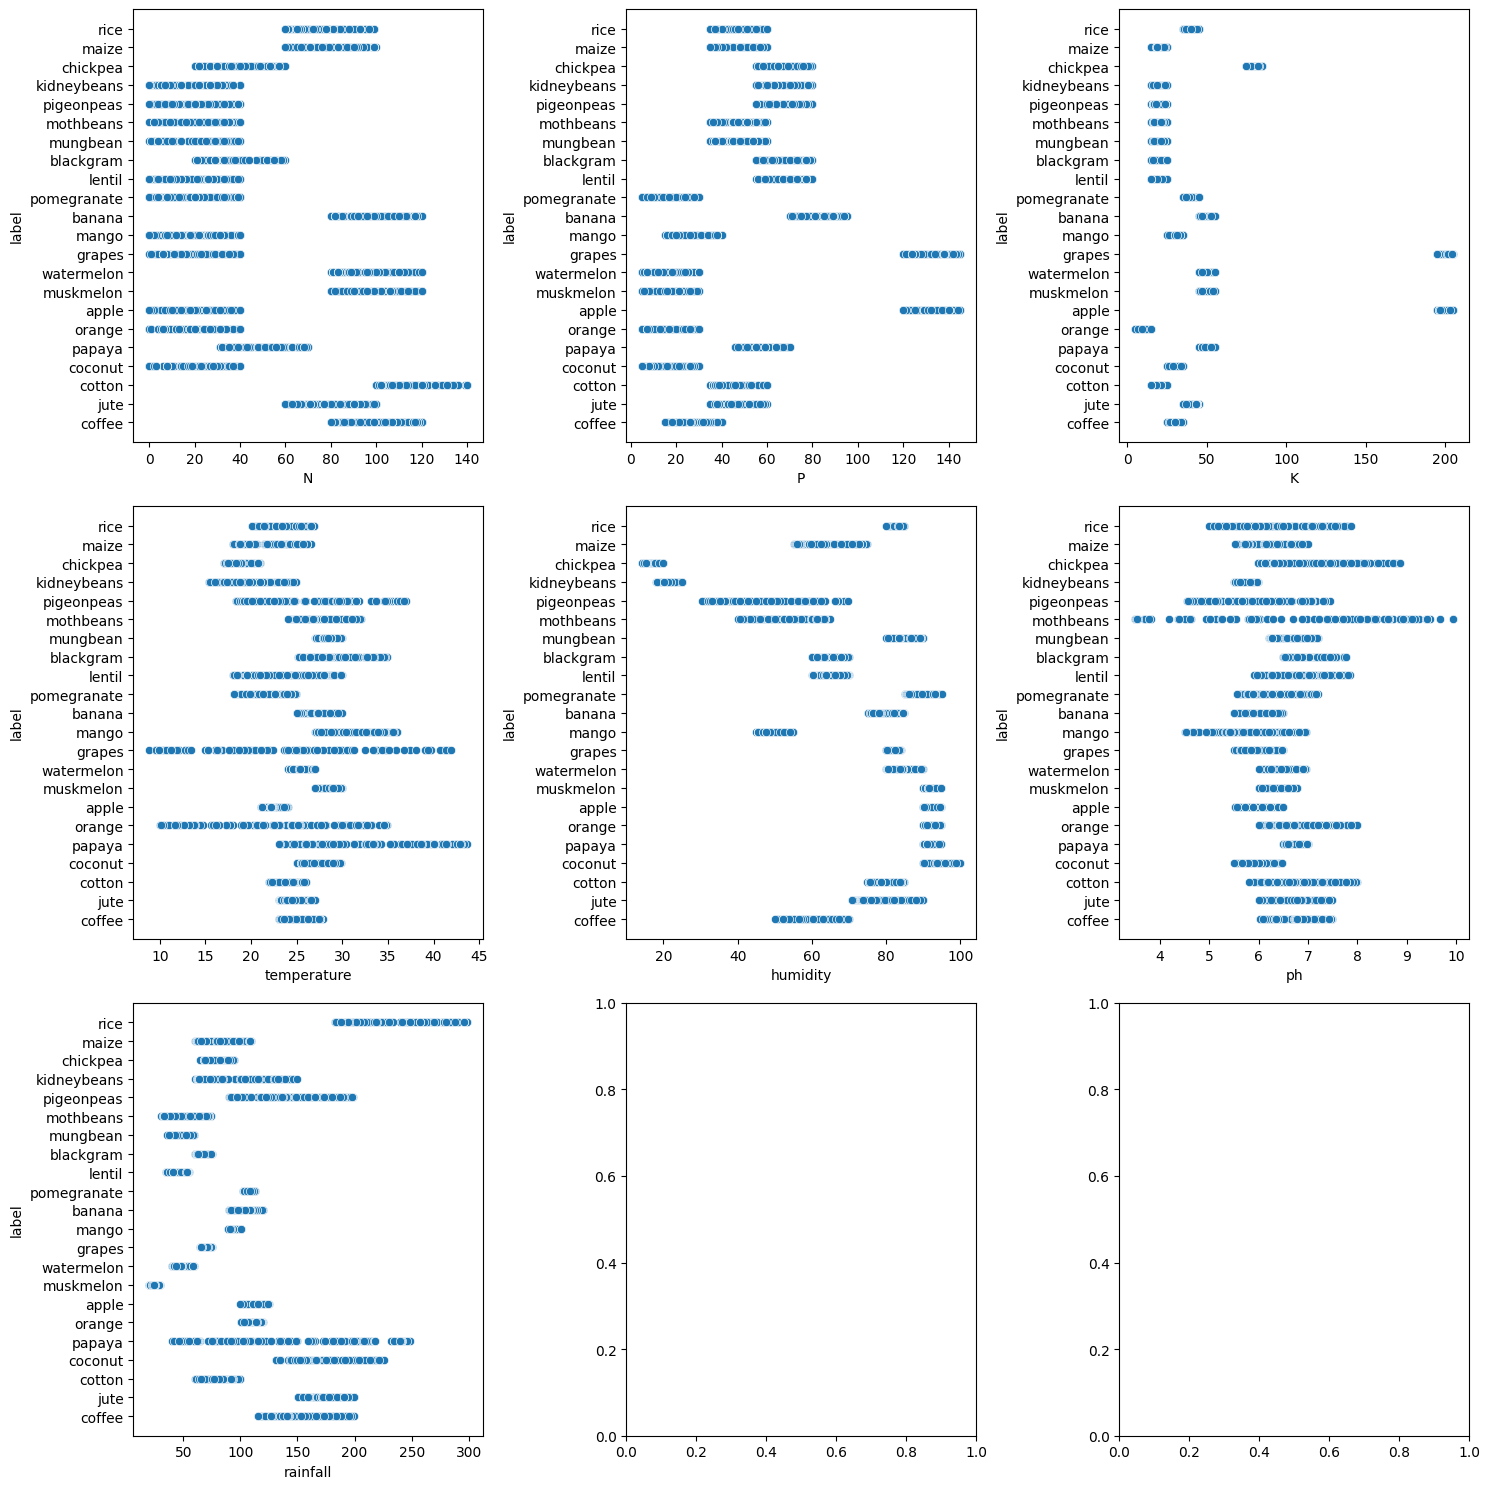

In [17]:
#plotting scatter plot
# fig,ax=plt.subplot(3, 3, figsize(15,15))
fig, ax=plt.subplots(3,3,figsize=(15,15))
for i, subplot in zip(feautures, ax.flatten()):
    sns.scatterplot(x=i,y='label',data=crop,ax=subplot)
plt.tight_layout()
plt.show()


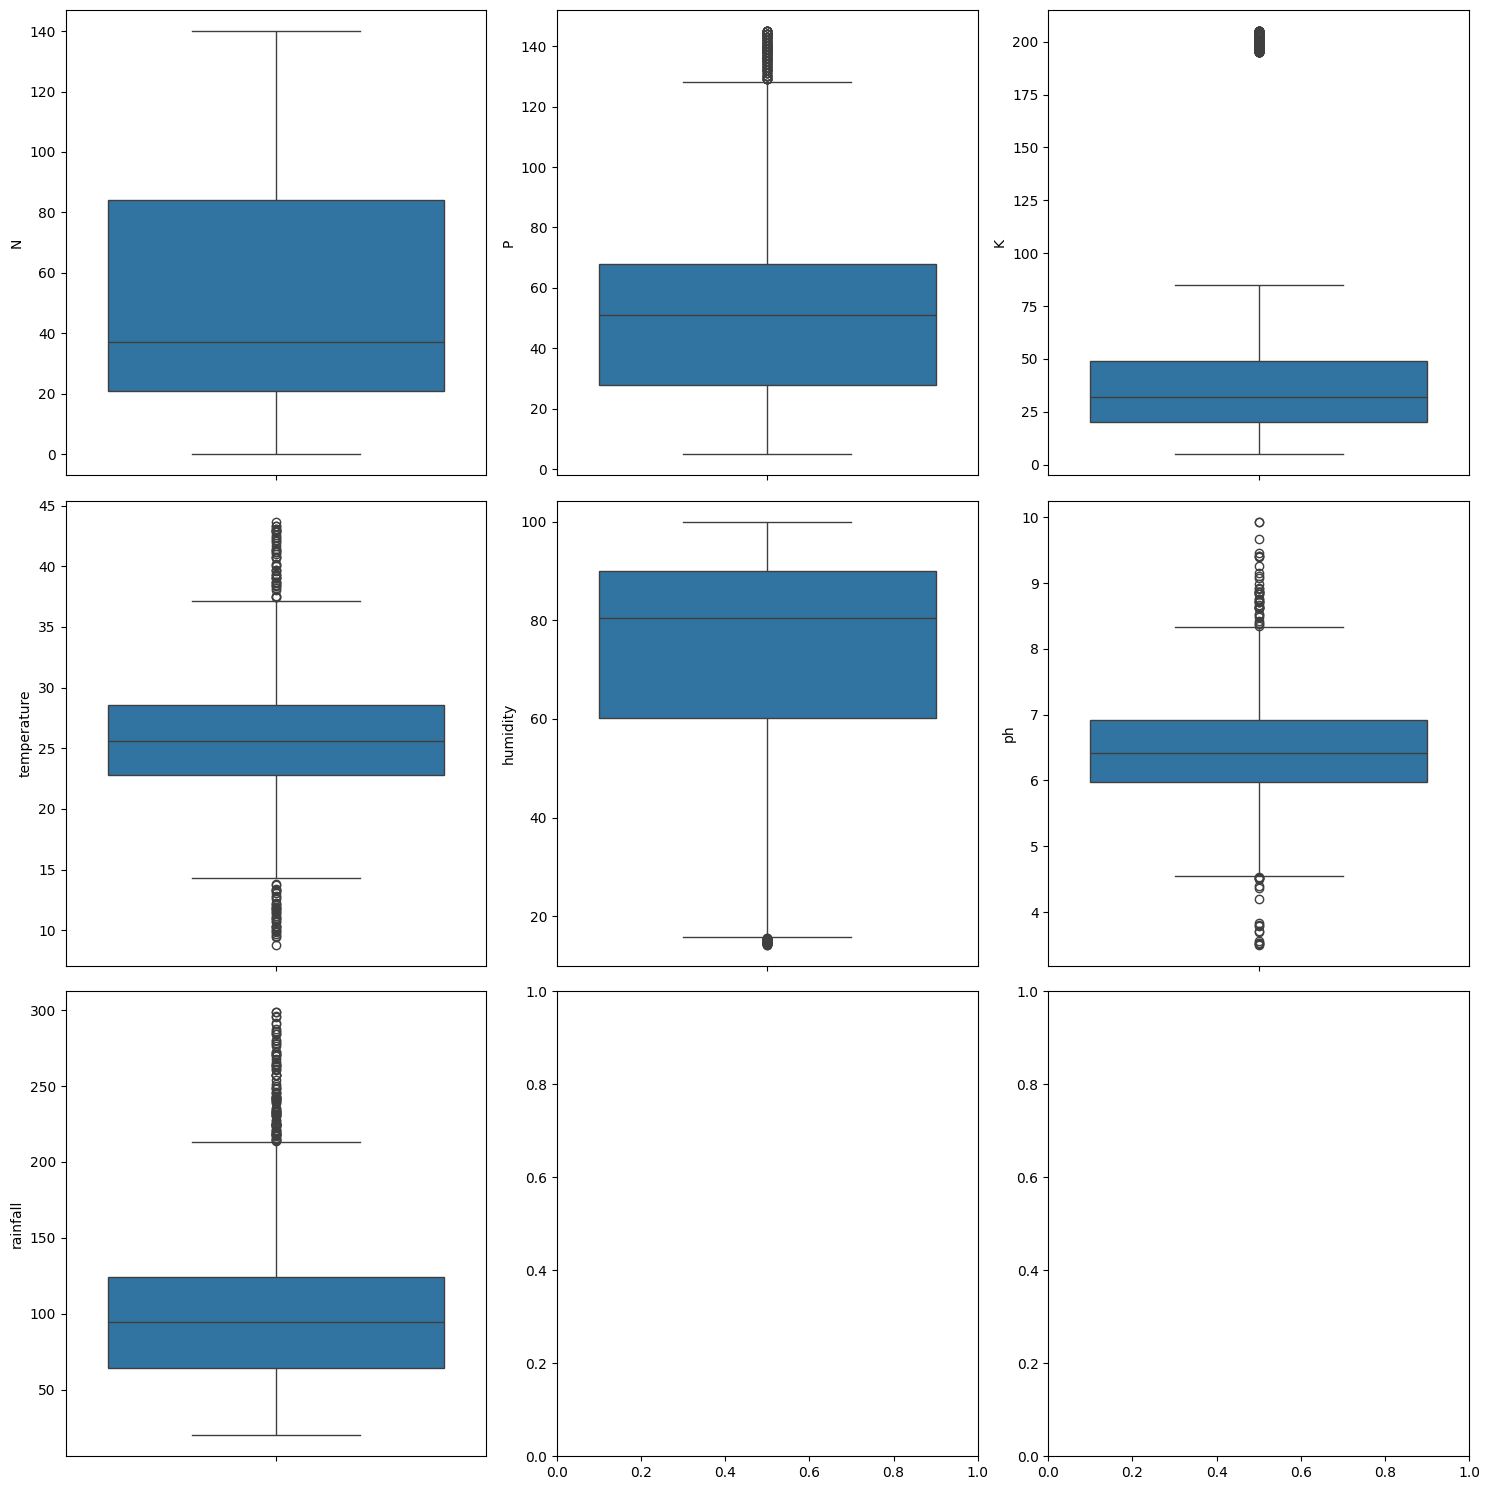

In [18]:
#finding outiers-boxplot
fig, ax=plt.subplots(3,3,figsize=(15,15))
for i ,subplot in zip(feautures , ax.flatten()):
    sns.boxplot(crop[i] , ax=subplot)
plt.tight_layout()
plt.show()


In [19]:
#correlation of the features
num_cols=crop.select_dtypes(include=[np.number])
num_cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [20]:
corr = num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

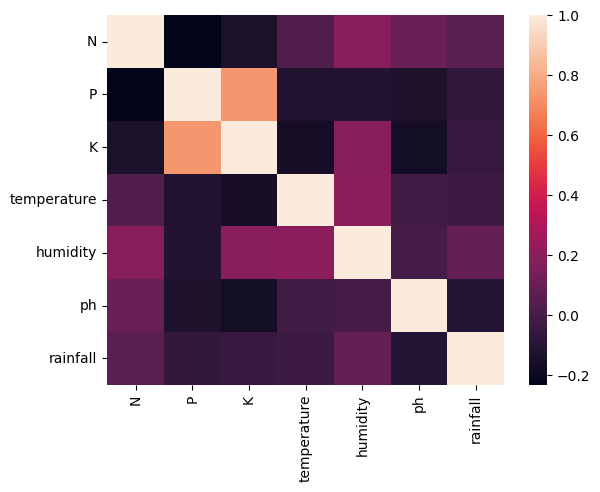

In [21]:
#visulizing with heatmap
sns.heatmap(corr)

<Axes: >

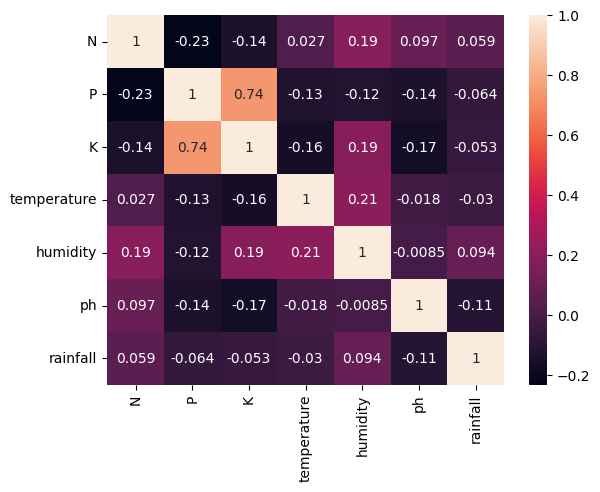

In [22]:
sns.heatmap(corr, annot=True)

<Axes: >

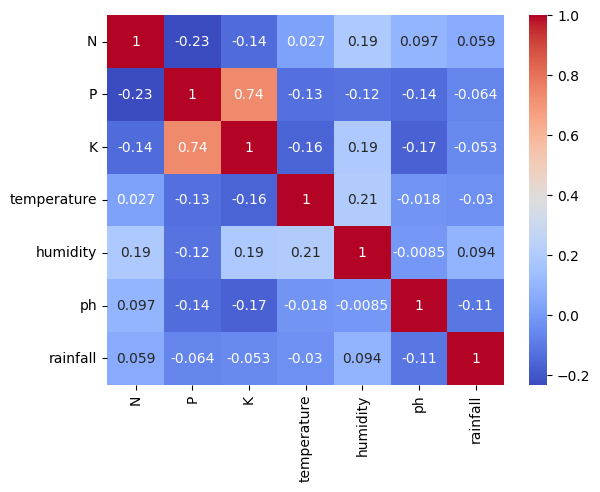

In [23]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

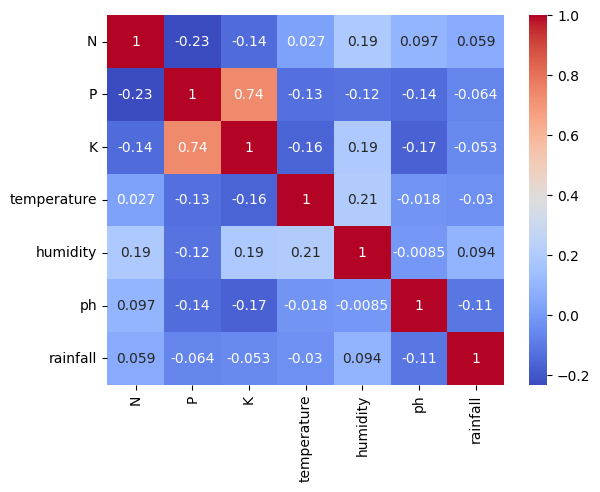

In [24]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Encoding

In [25]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [26]:
crop_dict={'rice':0,
           'maize':1,
           'chickpea':2,
           'kidneybeans':3,
           'pigeonpeas':4,
           
       'mothbeans':5,
       'mungbean':6,
       'blackgram':7,
       'lentil':8,
       'pomegranate':9,
       'banana':10,
       'mango':11,
       'grapes':12,
       'watermelon':13,
       'muskmelon':14,
       'apple':15,
       'orange':16, 
       'papaya':17,
       'coconut':18, 
       'cotton':19, 
       'jute':20,
       'coffee':21
       }

In [27]:
crop['crop_no']=crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0


In [30]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,21
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,21


In [28]:
crop.drop('label',axis=1,inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,21


In [29]:
# Train Test Split
X = crop.drop('crop_no', axis=1)
y = crop['crop_no']

In [30]:
X.shape

(2200, 7)

In [31]:
y.shape

(2200,)

In [134]:
!pip install scikit-learn


You should consider upgrading via the 'C:\Users\91781\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [35]:
X_train.shape

(1760, 7)

In [36]:
X_test.shape

(440, 7)

In [37]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [39]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
dtc.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [40]:
y_pred = dtc.predict(X_test_scaled)
acs = accuracy_score(y_test, y_pred)
print("Accuracy Score", acs)

Accuracy Score 0.9863636363636363


In [41]:
# Prediction
def crop_rec(N, P, K, temp, hum, ph, rain):
    features = np.array([N, P, K, temp, hum, ph, rain])
    transformed_features = scaler.transform([features])
    prediction = dtc.predict(transformed_features).reshape(1, -1)
    crop_dict = {
        0 : 'rice', 1 : 'maize', 2 : 'chickpea', 3 : 'kidneybeans', 4 : 'pigeonpeas',
        5 : 'mothbeans', 6 : 'mungbean', 7 : 'blackgram', 8 : 'lentil', 9 : 'pomegranate',
        10 : 'banana', 11 : 'mango', 12 : 'grapes', 13 : 'watermelon', 14 : 'muskmelon', 15 : 'apple',
        16 : 'orange', 17 : 'papaya', 18 : 'coconut', 19 : 'cotton', 20 : 'jute', 21 : 'coffee'
    }
    crop = [crop_dict[i] for i in prediction[0]]
    return f"{crop} is a best crop to grow in the farm."

In [43]:
# Predicting with the values
N = 94
P = 55
K = 55
temp = 26
hum = 83
ph = 8.1
rain = 186

crop_rec(N, P, K, temp, hum, ph, rain)

c:\Users\91781\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


"['jute'] is a best crop to grow in the farm."

In [141]:
import pickle

# Save the trained model
with open('crop_model.pkl', 'wb') as file:  
    pickle.dump(dtc, file)  

print("✅ Crop model saved successfully!")

✅ Crop model saved successfully!



Fertilizer Recommendation System Using ML

In [106]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [107]:

fertilizer = pd.read_csv("Dataset/Fertilizer Prediction.csv")
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [108]:
fertilizer.shape

(99, 9)

In [109]:
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [80]:
fertilizer.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [110]:
# check the duplicated values in the dataset
fertilizer.duplicated().sum()

np.int64(0)

In [111]:
# check the basic statistics of the dataset
fertilizer.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [84]:
# select only the numerical columns
fertilizer_numeric = fertilizer.select_dtypes(include=[np.number])
corr = fertilizer_numeric.corr()
corr

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


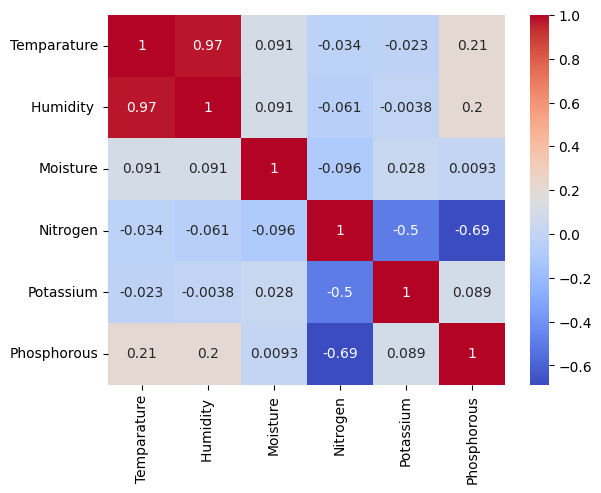

In [85]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')
plt.show()

In [112]:
fertilizer['Fertilizer Name'].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

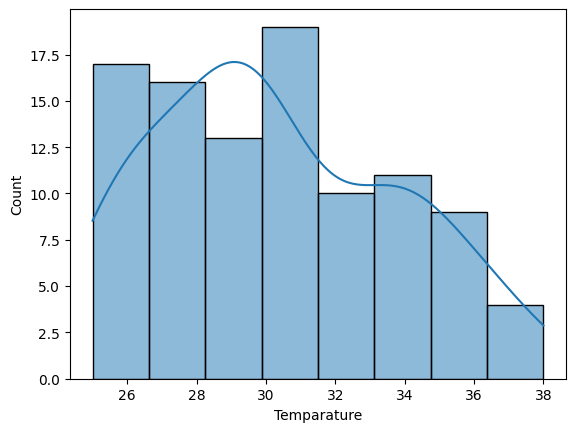

In [113]:
sns.histplot(fertilizer['Temparature'], kde=True)
plt.show()

In [114]:
# Only select the numerical columns 
features = fertilizer.select_dtypes(include=[np.number]).columns.tolist()
print(features)

['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']


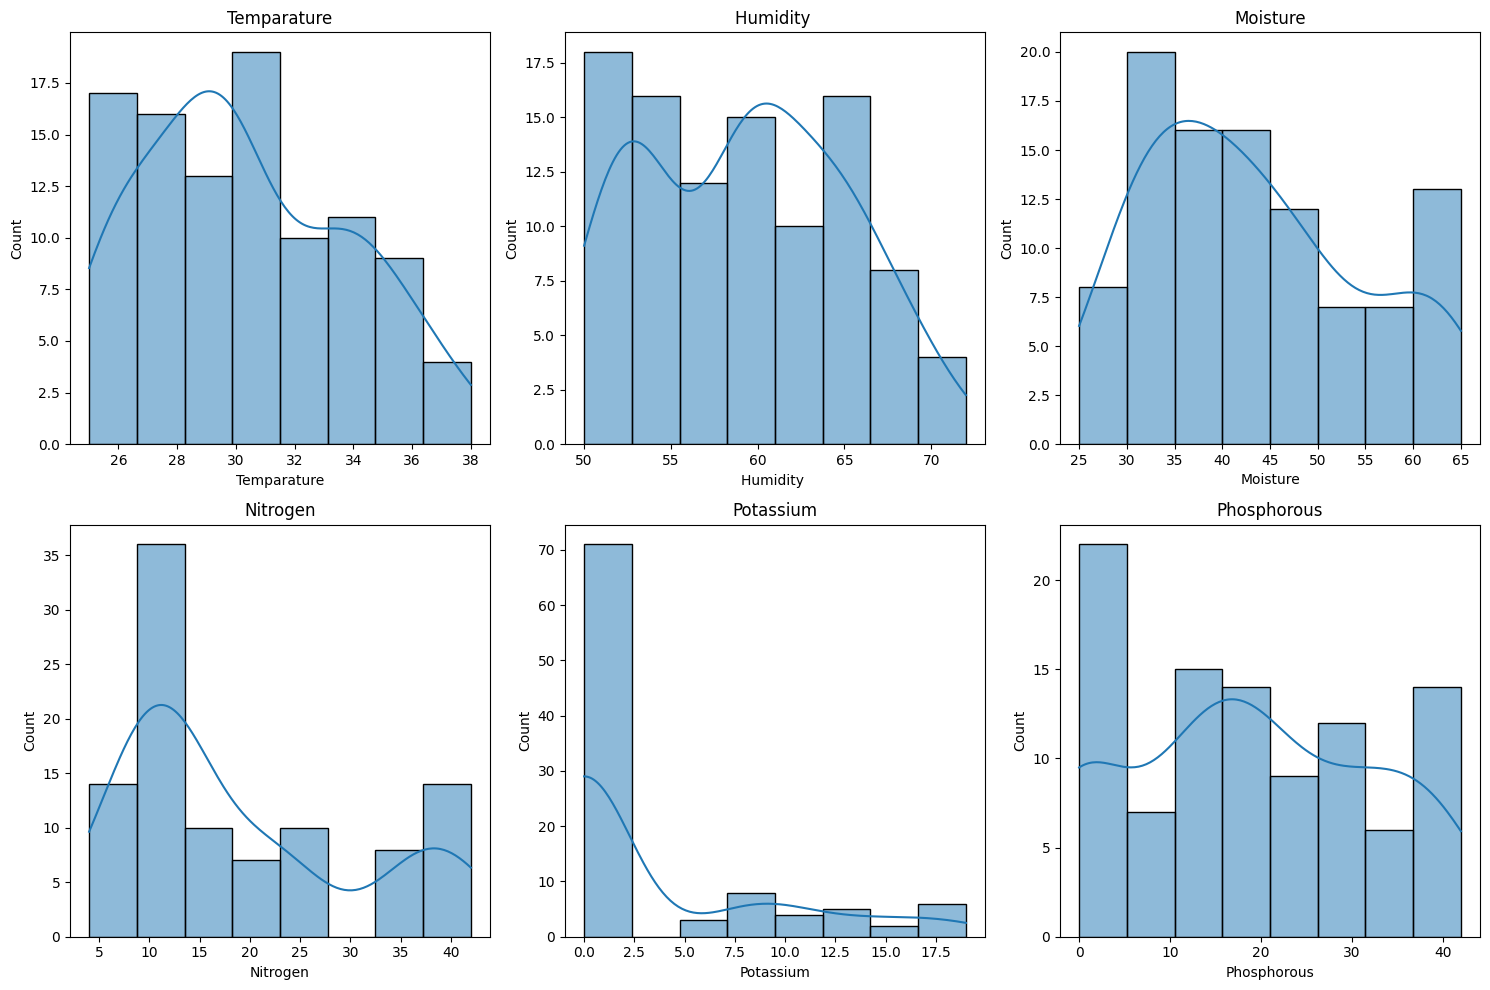

In [115]:
# visualize the distribution of each feature
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(fertilizer[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

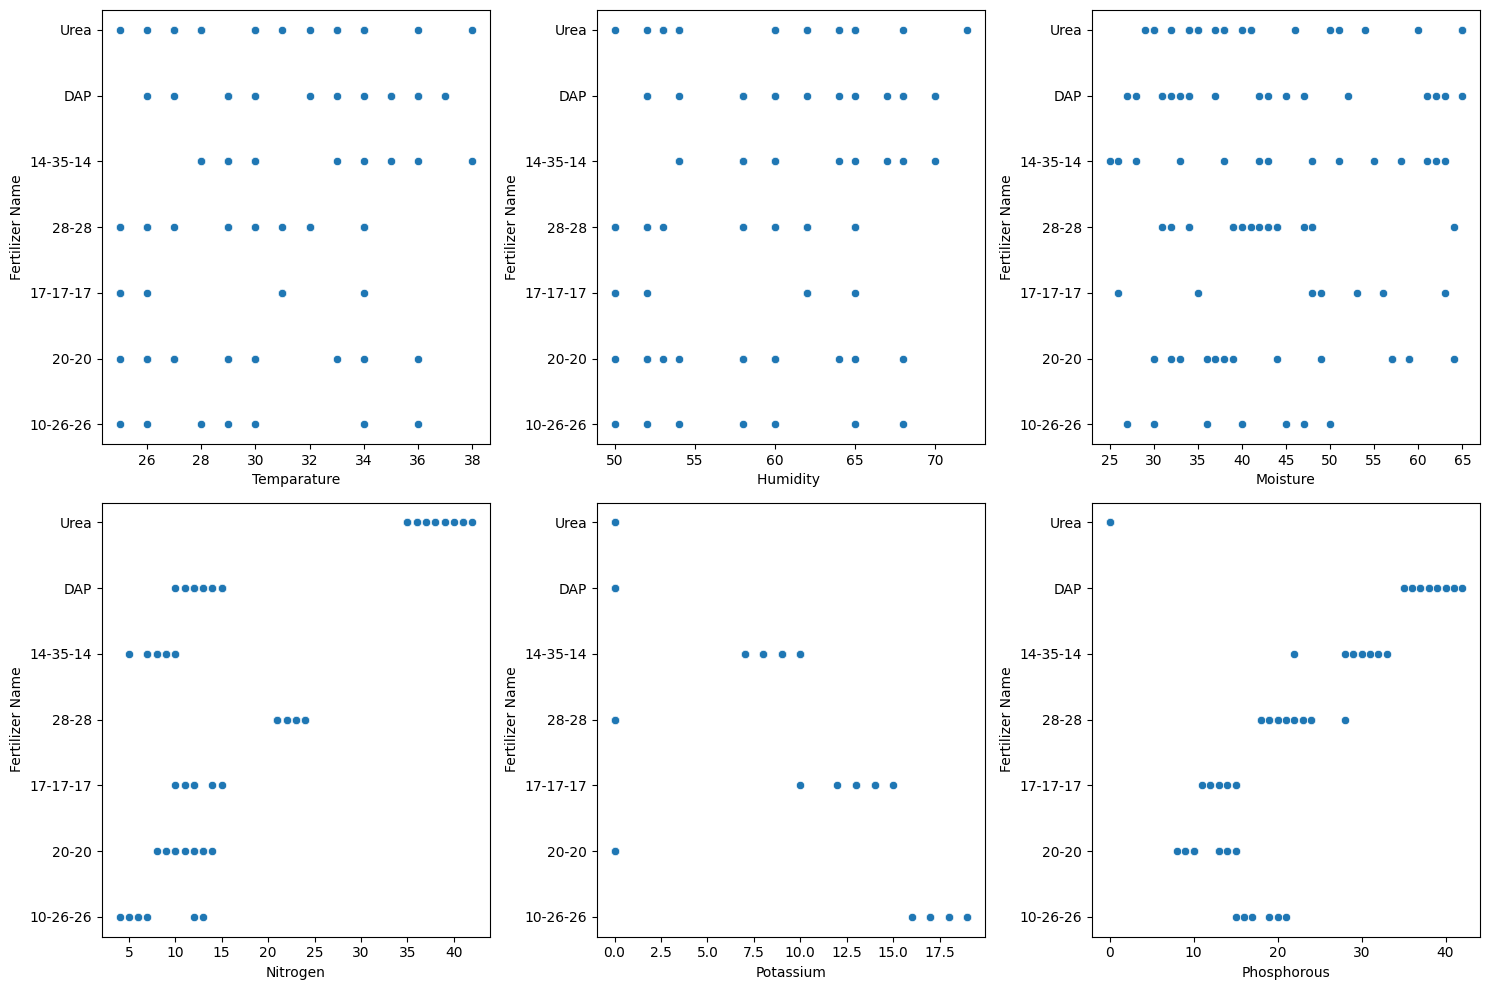

In [116]:
# plot scatter plot of each feature against the target
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='Fertilizer Name', data=fertilizer, ax=subplot)
plt.tight_layout()
plt.show()

In [90]:
fert_dict = {
'Urea':1,
'DAP':2,
'14-35-14':3,
'28-28':4,
'17-17-17':5,
'20-20':6,
'10-26-26':7,
}

In [117]:
fertilizer['fert_no'] = fertilizer['Fertilizer Name'].map(fert_dict)

In [118]:
fertilizer['fert_no'].value_counts()

fert_no
1    22
2    18
4    17
3    14
6    14
5     7
7     7
Name: count, dtype: int64

In [119]:
# drop the target column with name and keep the target column with numbers
fertilizer.drop('Fertilizer Name',axis=1,inplace=True)
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,Sandy,Maize,37,0,0,1
1,29,52,45,Loamy,Sugarcane,12,0,36,2
2,34,65,62,Black,Cotton,7,9,30,3
3,32,62,34,Red,Tobacco,22,0,20,4
4,28,54,46,Clayey,Paddy,35,0,0,1


In [120]:
# Select the object columns
fertilizer.select_dtypes(include=['object']).columns

Index(['Soil Type', 'Crop Type'], dtype='object')

In [121]:
# convert the categorical columns to numerical columns using labelencoder
lb = LabelEncoder()
fertilizer["Soil Type"]=lb.fit_transform(fertilizer['Soil Type'])
fertilizer['Crop Type']=lb.fit_transform(fertilizer['Crop Type'])

In [122]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,4,3,37,0,0,1
1,29,52,45,2,8,12,0,36,2
2,34,65,62,0,1,7,9,30,3
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,1


In [123]:
# split the dataset into features and target
x = fertilizer.drop('fert_no',axis=1)
y = fertilizer['fert_no']
# print the shape of features and target
print(f"The shape of features is: {x.shape}")
print(f"The shape of target is: {y.shape}")

The shape of features is: (99, 8)
The shape of target is: (99,)


In [124]:

# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

# print the shape of training and testing sets
print(f"The shape of x_train is: {x_train.shape}")
print(f"The shape of x_test is: {x_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of x_train is: (79, 8)
The shape of x_test is: (20, 8)
The shape of y_train is: (79,)
The shape of y_test is: (20,)


In [125]:
# Scale the features using StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [126]:
# insialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

In [127]:
# train the model
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [128]:
accuracy = model.score(x_test, y_test)
print(f"The accuracy of the model is: {accuracy*100:.2f}%")

The accuracy of the model is: 100.00%


In [129]:
# evaluate the model on the training set and print the accuracy
accuracy = model.score(x_train, y_train)
print(f"The accuracy of the model on the training set is: {accuracy*100:.2f}%")

The accuracy of the model on the training set is: 100.00%


In [130]:
def recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous):
    features = np.array([[Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous]])
    transformed_features = sc.transform(features)
    prediction = model.predict(transformed_features).reshape(1,-1)
    fert_dict = {1: 'Urea', 2: 'DAP', 3: '14-35-14', 4: '28-28', 5: '17-17-17', 6: '20-20', 7: '10-26-26'}
    fertilizer = [fert_dict[i] for i in prediction[0]]
    
    return f"{fertilizer} is a best fertilizer for the given conditions" 

In [131]:
# Given input values
Temparature = 23
Humidity = 0.7
Moisture = 0.3
Soil_Type = 1
Crop_Type = 2
Nitrogen = 8
Potassium = 10
Phosphorous = 6
    
# Use the recommendation function to get a prediction
recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous)

"['17-17-17'] is a best fertilizer for the given conditions"

In [143]:
# Save the trained model
with open('fertilizer_model.pkl', 'wb') as file:  
    pickle.dump(model, file)  

# Save the trained model
with open('fertilizer_model.pkl', 'wb') as file:  
    pickle.dump(model, file)  

print("✅ Fertilizer model saved successfully!")

✅ Fertilizer model saved successfully!


In [ ]:
# import pandas as pd
# import pickle
# from sklearn.ensemble import RandomForestClassifier  # Or another suitable classifier
# from sklearn.ensemble import RandomForestRegressor # Or another suitable regressor

# # Crop Recommendation Model Training
# # (Replace with your actual data and preprocessing if you have it)
# crop_data = {
#     'N': [96, 50, 110, 80, 70],  # Example data
#     'P': [58, 60, 45, 75, 55],
#     'K': [56, 40, 60, 50, 45],
#     'temperature': [24.0, 26.0, 22.0, 28.0, 25.0],
#     'humidity': [79.99, 75.0, 85.0, 70.0, 80.0],
#     'ph': [6.0, 6.5, 5.5, 7.0, 6.2],
#     'rainfall': [170.0, 150.0, 200.0, 100.0, 180.0],
#     'label': [17, 1, 4, 12, 7]  # Crop labels (replace with your actual labels)
# }
# crop_df = pd.DataFrame(crop_data)

# crop_model = RandomForestClassifier(random_state=42)  # Initialize a classifier
# crop_model.fit(crop_df.drop('label', axis=1), crop_df['label'])  # Train the model

# with open('crop_model.pkl', 'wb') as file:
#     pickle.dump(crop_model, file)  # Save the trained model


# # Fertilizer Recommendation Model Training
# # (Replace with your actual data and preprocessing if you have it)
# fertilizer_data = {
#     'Temparature': [20.0, 25.0, 18.0, 22.0, 24.0],  # Example data
#     'Humidity': [0.9, 0.8, 0.7, 0.85, 0.95],
#     'Moisture': [0.3, 0.25, 0.35, 0.2, 0.4],
#     'Soil Type': [1, 2, 1, 3, 1],
#     'Crop Type': [2, 1, 3, 2, 1],
#     'Nitrogen': [15, 20, 12, 18, 16],
#     'Potassium': [19, 25, 15, 22, 20],
#     'Phosphorous': [10, 15, 8, 12, 11],
#     'label': [2, 1, 3, 2, 1]  # Fertilizer labels (replace with your actual labels)
# }
# fertilizer_df = pd.DataFrame(fertilizer_data)

# fertilizer_model = RandomForestRegressor(random_state=42)  # Initialize a regressor
# fertilizer_model.fit(fertilizer_df.drop('label', axis=1), fertilizer_df['label'])  # Train the model

# with open('fertilizer_model.pkl', 'wb') as file:
#     pickle.dump(fertilizer_model, file)  # Save the trained model

# print("crop_model.pkl and fertilizer_model.pkl files generated successfully!")

crop_model.pkl and fertilizer_model.pkl files generated successfully!
